<a href="https://colab.research.google.com/github/ktomoya0309/distortion/blob/main/%E3%83%92%E3%83%BC%E3%83%88%E3%83%9E%E3%83%83%E3%83%97%E8%AA%AD%E3%81%BF%E5%8F%96%E3%82%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ライブラリの読み込み

In [ ]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from google.colab import files
print(cv2.__version__) #opencvのバージョンを表示して、読み込みを確認する。

4.1.2


目盛の範囲

In [ ]:
scale_min = 0.1 #目盛の最小値
scale_max = 0.64 #目盛の最大値
h_back = 137 #背景のHue

目盛の読み取り

['0.1', '0.10046632124352332', '0.10093264248704664', '0.10139896373056996', '0.10186528497409326', '0.10233160621761658', '0.1027979274611399', '0.10326424870466322', '0.10373056994818654', '0.10419689119170986', '0.10466321243523316', '0.10512953367875648', '0.1055958549222798', '0.10606217616580312', '0.10652849740932643', '0.10699481865284975', '0.10746113989637307', '0.10792746113989637', '0.10839378238341969', '0.10886010362694301', '0.10932642487046633', '0.10979274611398965', '0.11025906735751295', '0.11072538860103627', '0.11119170984455959', '0.1116580310880829', '0.11212435233160623', '0.11259067357512954', '0.11305699481865286', '0.11352331606217617', '0.11398963730569948', '0.1144559585492228', '0.11492227979274612', '0.11538860103626944', '0.11585492227979276', '0.11632124352331608', '0.11678756476683938', '0.1172538860103627', '0.11772020725388602', '0.11818652849740933', '0.11865284974093265', '0.11911917098445596', '0.11958549222797929', '0.1200518134715026', '0.120518

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

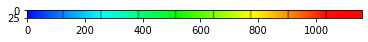

In [ ]:
# ファイル名(IMG_20200808_181512.jpg)を自分の目盛のファイル名に変更
img = cv2.imread("./1-2.png") # 画像の読み込み
RGB_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #BGRをRGBに変換
HSV_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV) #BGRをHSVに変換
plt.imshow(RGB_img) #元の画像を表示
h, s, v = cv2.split(HSV_img)
h = list(map(str,h[int(len(h)/2)])) #真ん中の1行を抽出
scale = np.linspace(scale_min,scale_max,len(h)) #hの長さに合わせて変換する物理値を定義
scale_str = list(map(str,scale))
print(scale_str)
colorbar = np.vstack([h,scale]) #カラーバーの読み取り値
bar_dict = dict(zip(h,scale_str)) #変換表の辞書を作成
print(bar_dict)

bar = []
for key,value in bar_dict.items():
  bar.append([key,value]) #辞書を配列に変換

bar_len = len(bar_dict) #変換表の行数を取得
print(bar_len)

len_err = 0

if bar_len != 121: #変換表が0～120になっていない場合
  len_err = 1
  df = pd.DataFrame(bar)
  df.to_csv("bar.csv",index = False,header = False)
  files.download('bar.csv')

  df = pd.DataFrame(colorbar)
  df.to_csv("colorbar.csv",index = False,header = False)
  files.download('colorbar.csv')

変換表が0～120になっていない場合



In [ ]:
if len_err ==1:
  df = pd.read_csv('bar_1.csv',dtype = str,header = None)
  print(df)
  bar_dict = dict(zip(df[0], df[1]))
  print(bar_dict)
  bar_len = len(bar_dict) #変換表の行数を取得
  print(bar_len)

       0            1
0    120          0.1
1    119  0.100932642
2    118  0.104663212
3    117  0.108393782
4    116  0.112124352
..   ...          ...
116    4  0.573782383
117    3  0.577512953
118    2  0.582642487
119    1  0.621813472
120    0         0.64

[121 rows x 2 columns]
{'120': '0.1', '119': '0.100932642', '118': '0.104663212', '117': '0.108393782', '116': '0.112124352', '115': '0.115854922', '114': '0.120984456', '113': '0.123782383', '112': '0.128445596', '111': '0.132176166', '110': '0.135906736', '109': '0.140103627', '108': '0.145233161', '107': '0.147564767', '106': '0.152694301', '105': '0.158290155', '104': '0.160621762', '103': '0.165751295', '102': '0.169481865', '101': '0.173678756', '100': '0.17880829', '99': '0.18253886', '98': '0.18626943', '97': '0.190466321', '96': '0.195595855', '95': '0.199326425', '94': '0.203523316', '93': '0.20865285', '92': '0.21238342', '91': '0.21611399', '90': '0.220777202', '89': '0.225440415', '88': '0.229170984', '87': '0.23

グラフの読み取り

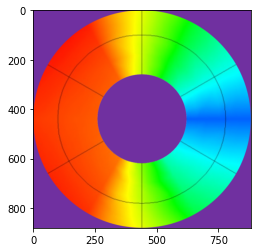

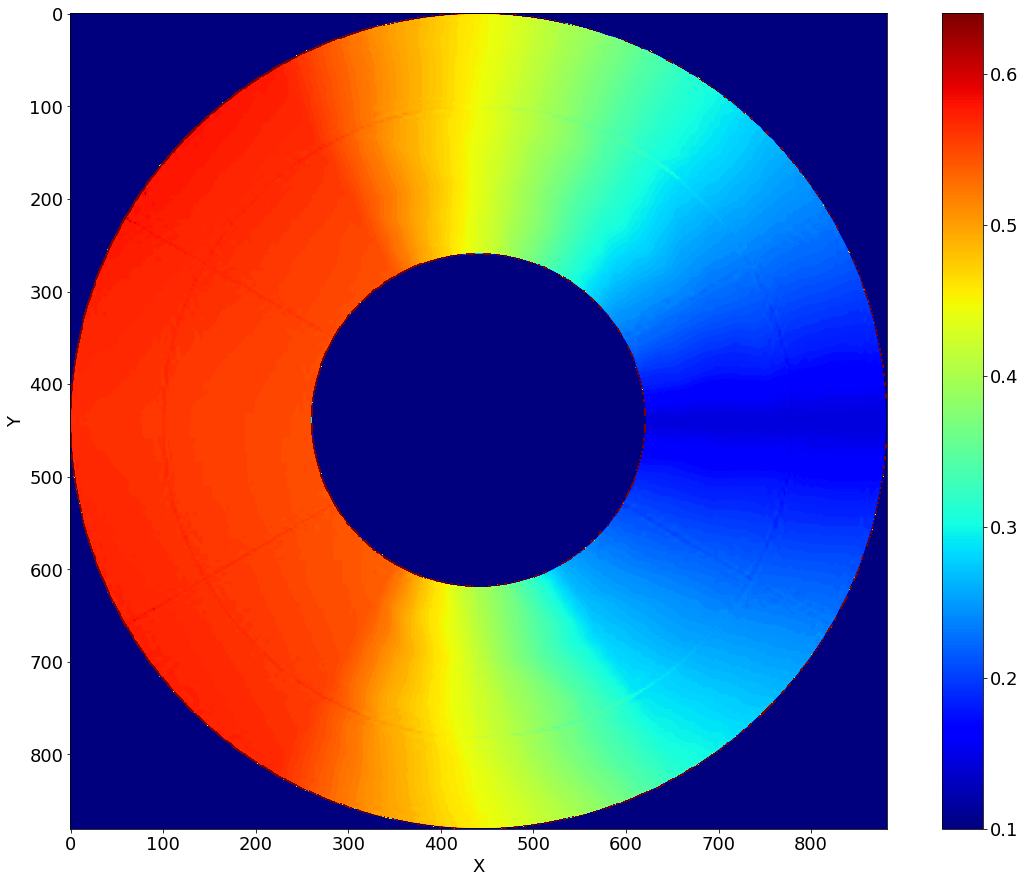

In [ ]:
img = cv2.imread("./1-1.png") # グラフの読み込み
BGR_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #BGRをRGBに変換
HSV_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV) #BGRをHSVに変換
plt.imshow(BGR_img) #元の画像を表示
h, s, v = cv2.split(HSV_img) #Hueのみ抽出
h = np.where(h==h_back,-1,h) #背景を-1に変換
h_list = h.tolist()
h_str = [[str(n) for n in i] for i in h_list]
p = [[re.sub('^({})$'.format('|'.join(map(re.escape, bar_dict.keys()))), lambda m: bar_dict[m.group()], s) for s in text] for text in h_str]
p = [[float(s) for s in text] for text in p]

#可視化
plt.rcParams["font.size"] = 18 #文字の大きさ
plt.figure(figsize=(20,15)) #グラフの大きさ
plt.imshow(p,cmap="jet",vmin=scale_min,vmax=scale_max) #カラーバーの色と範囲
plt.colorbar () # カラーバーの表示 
plt.xlabel('X') #x軸ラベル
plt.ylabel('Y') #y軸ラベル
plt.show()

csvダウンロード

In [ ]:
DL = 0 #1:目盛のcsvをダウンロード,2:換算後のグラフのcsvをダウンロード,3:両方ダウンロード
if DL == 1 or DL ==3:
  df = pd.DataFrame(bar)
  df.to_csv("bar.csv",index = False,header = False)
  files.download('bar.csv')

  df = pd.DataFrame(colorbar)
  df.to_csv("colorbar.csv",index = False,header = False)
  files.download('colorbar.csv')

if DL == 2 or DL == 3:
  df = pd.DataFrame(p)
  df.to_csv("p.csv",index = False,header = False)
  files.download('p.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>